In [1]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
from project.dataset import Dataset, VALDODataset
from project.preprocessing import NiftiToTensorTransform
from project.utils import compute_statistics

d:\Programming Files\Python\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.20 (you have 1.4.7). Upgrade using: pip install --upgrade albumentations


In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [3]:
ds = Dataset()

data = pd.read_csv('targets.csv')
data.shape

(7986, 5)

In [4]:
ch1 = ds.load_raw_mri(1)
data = data[data.mri.isin(ch1)]
data.shape

(385, 5)

In [5]:
cases = data.mri
masks = data.masks
target = data.target

In [6]:
global_min, global_max = compute_statistics(cases)

pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1

In [7]:
global_min

0.0

In [8]:
global_max

1417.92822265625

In [9]:
raw_transform = NiftiToTensorTransform(
    target_shape = (256, 256), 
)

In [10]:
normalized_transform = NiftiToTensorTransform(
    target_shape = (256, 256), 
    normalization=(global_min, global_max)
)

In [11]:
raw_dataset = VALDODataset(
    cases=cases,
    masks=masks,
    target=target,
    transform=raw_transform,
)

In [12]:
normalized_dataset = VALDODataset(
    cases=cases,
    masks=masks,
    target=target,
    transform=normalized_transform,
)

### Comparison prenormalized vs normalized


pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


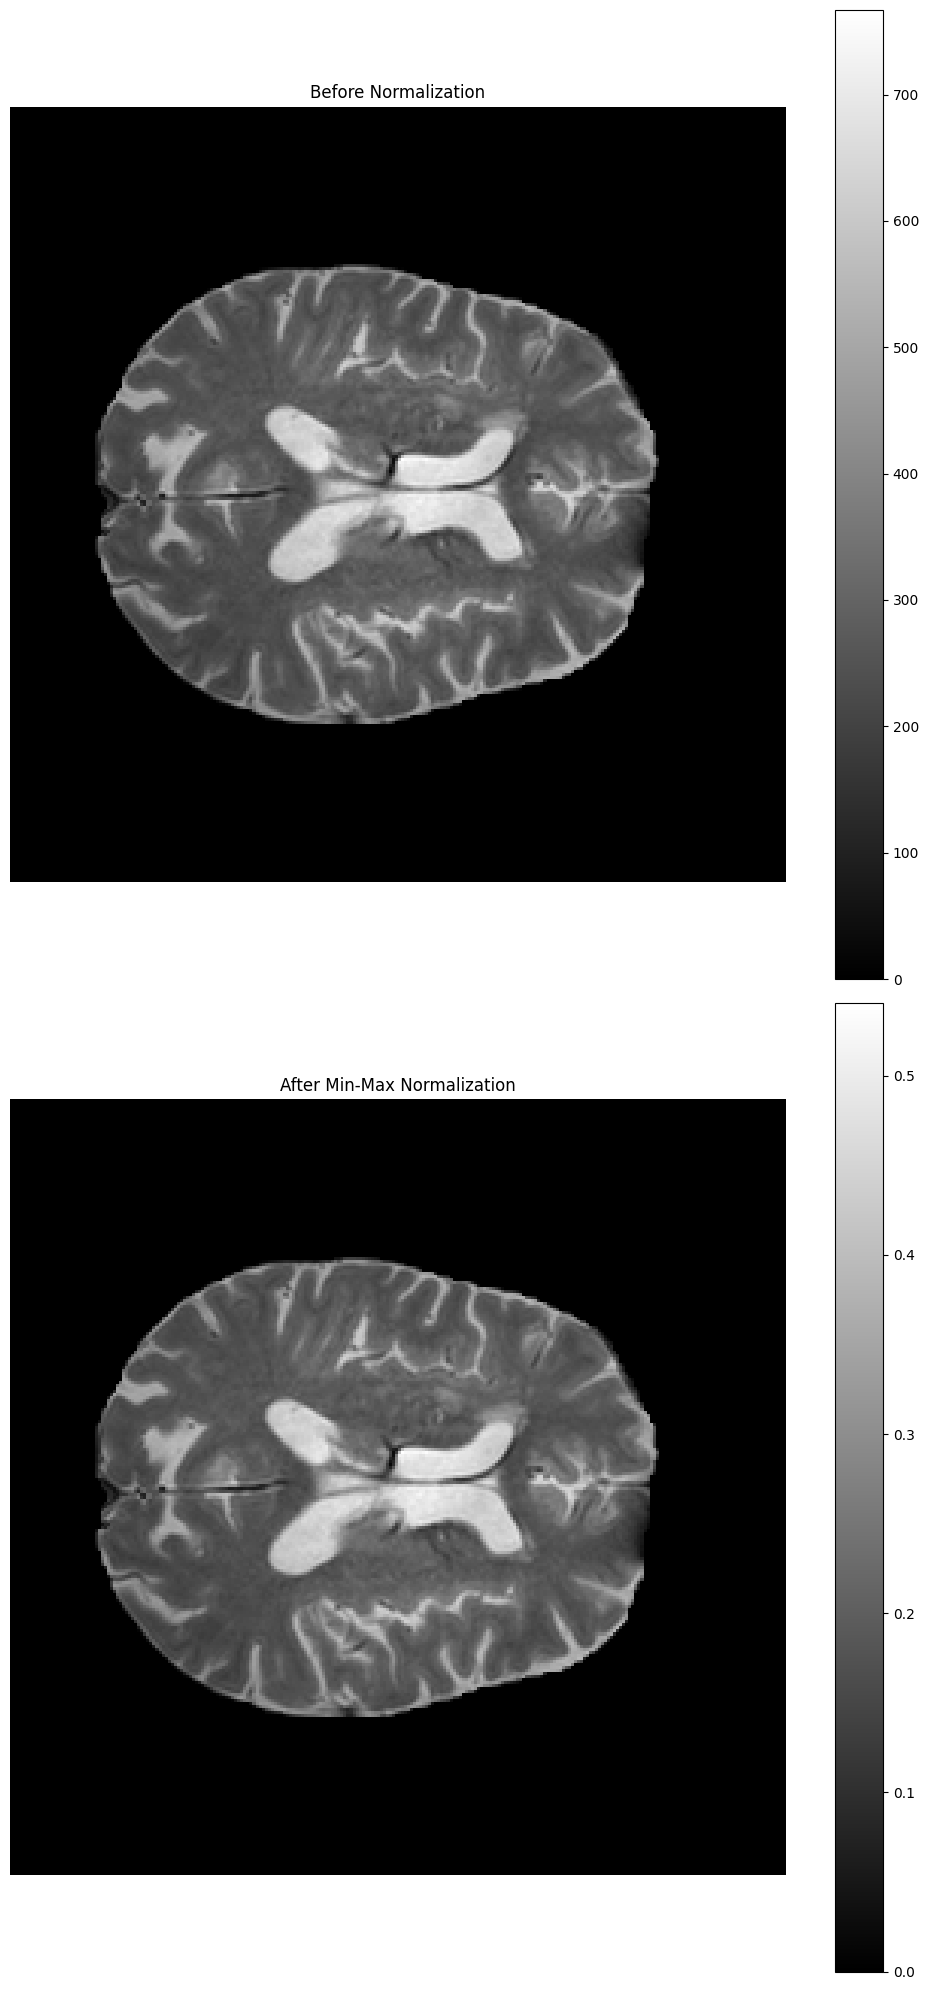

In [14]:
tensor1 = raw_dataset[0][0][20, 0, 0, :, :]  
tensor2 = normalized_dataset[0][0][20, 0, 0, :, :]  

fig, axs = plt.subplots(2, 1, figsize=(10, 20))

axs[0].imshow(tensor1, cmap='gray')
axs[0].set_title("Before Normalization")
axs[0].axis('off')

axs[1].imshow(tensor2, cmap='gray')
axs[1].set_title("After Min-Max Normalization")
axs[1].axis('off')

fig.colorbar(axs[0].imshow(tensor1, cmap='gray'), ax=axs[0])
fig.colorbar(axs[1].imshow(tensor2, cmap='gray'), ax=axs[1])
plt.tight_layout()
plt.show()


(-0.5, 255.5, 255.5, -0.5)

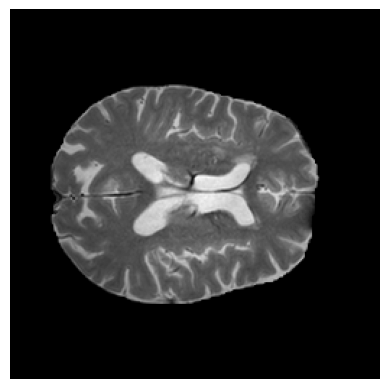

In [15]:
plt.imshow(tensor1, cmap='gray')
plt.axis('off')

(-0.5, 255.5, 255.5, -0.5)

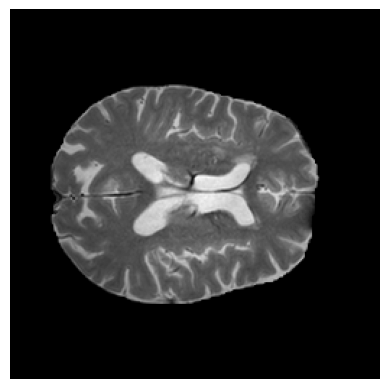

In [16]:
plt.imshow(tensor2, cmap='gray')
plt.axis('off')

(-0.5, 255.5, 255.5, -0.5)

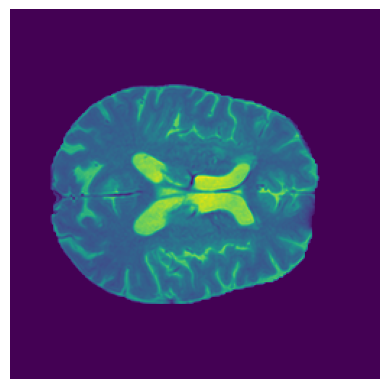

In [18]:
plt.imshow(tensor1)
plt.axis('off')

(-0.5, 255.5, 255.5, -0.5)

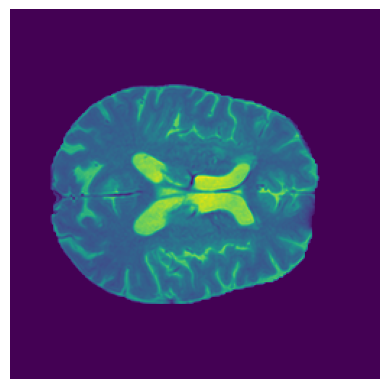

In [17]:
plt.imshow(tensor2)
plt.axis('off')